In [6]:
import pandas as pd
import matplotlib.pyplot as plt

#read the files
df_cvec = pd.read_csv('3a_CountVectorized.csv')
df_tfid = pd.read_csv('3b_TfidfVectorized.csv')
df_hash = pd.read_csv('3c_HashingVectorized.csv')
df_smot = pd.read_csv('3d_CountVec_SMOTEd.csv')
df_pcas = pd.read_csv('3e_CountVec_PCA+SMOTEd.csv')
df_tsvd = pd.read_csv('3f_CountVec_TSVD+SMOTEd.csv')
df_w2vm = pd.read_csv('3g_Word2Vec_ML.csv')
df_dnns = pd.read_csv('3h_Word2Vec_GloVe_CNN_RNN.csv')

In [7]:
df_all = pd.concat([df_cvec, df_tfid, df_hash, df_smot, df_pcas, df_tsvd, df_w2vm, df_dnns], axis=0)
df_all2 = df_all.set_index(['vectorizer', 'model', 'accuracy', 'class'])
df_all2

precision    recall  f1-score  \
vectorizer    model    accuracy class                                       
CountVect     LogReg   0.830986 neg_review   0.833333  0.312500  0.454545   
                                pos_review   0.830769  0.981818  0.900000   
                                average      0.831347  0.830986  0.799616   
              KNN      0.798122 neg_review   0.647059  0.229167  0.338462   
                                pos_review   0.811224  0.963636  0.880886   
...                                               ...       ...       ...   
Deep_Learning CNN      0.771863 pos_review   0.854839  0.828125  0.841270   
                                average      0.778329  0.771863  0.774677   
              RNN_LSTM 0.832700 neg_review   0.728814  0.605634  0.661538   
                                pos_review   0.862745  0.916667  0.888889   
                                average      0.826589  0.832700  0.827513   

                                            support  
vectorizer    model    accuracy class                
CountVect     LogReg   0.830986 neg_review     48.0  
                                pos_review    165.0  
                                average       213.0  
              KNN      0.798122 neg_review     48.0  
                                pos_review    165.0  
...                                             ...  
Deep_Learning CNN      0.771863 pos_review    192.0  
                                average       263.0  
              RNN_LSTM 0.832700 neg_review     71.0  
                                pos_review    192.0  
                                average       263.0  

[264 rows x 4 columns]

In [8]:
def f1_score_bar_plot(df, column, title):
    
    '''This function plots F1 scores from the given DataFrame and class'''
    
    plt.style.use('seaborn-pastel')
    x = list(df[column])
    y = list(df['f1-score'])
    y_round = list(round(df['f1-score'],2))
    a = (list(df['f1-score'])).index(max(list(df['f1-score'])))
    z = (list(df['f1-score'])).index(min(list(df['f1-score'])))
    y_mean = round(df['f1-score'].mean(),2)
    
    plt.rcParams['figure.figsize']=[15,5]
    b_plot = plt.bar(x = x, height = y)
    b_plot[a].set_color('blue')
    b_plot[z].set_color('magenta')
    
    for i,v in enumerate(y_round):
        plt.text(i-.2, 0.018, str(v), color='black', fontsize=15, fontweight='bold')
    
    plt.axhline(y_mean, ls='--', color='k', label=y_mean)
    plt.title(title)
    plt.legend(loc='upper right')
    
    return plt.show()

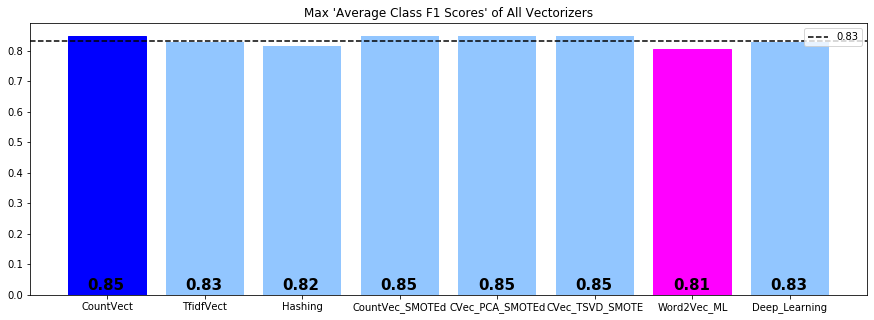

In [9]:
# Max "Average F1 Scores" of All
df_avg = df_all[df_all['class']=='average']
df_avg = df_avg.groupby(['vectorizer'], sort=False)['f1-score'].max()
df_avg = df_avg.reset_index()
f1_score_bar_plot(df=df_avg, column='vectorizer', title="Max 'Average Class F1 Scores' of All Vectorizers")

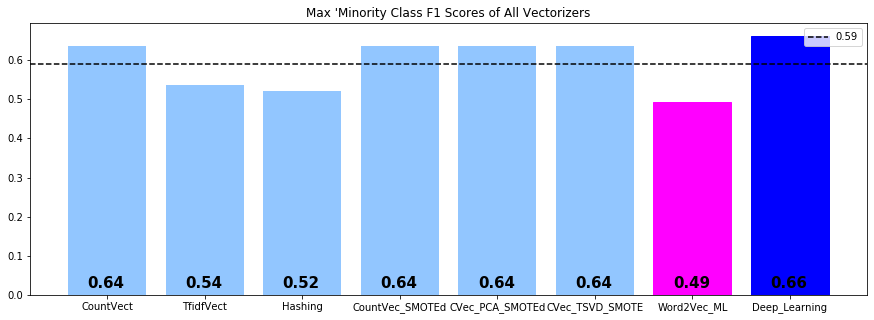

In [10]:
# Max "Minority Class F1 Scores" of All Vectorizers

df_neg = df_all[df_all['class']=='neg_review']
df_neg = df_neg.groupby(['vectorizer'], sort=False)['f1-score'].max()
df_neg = df_neg.reset_index()
f1_score_bar_plot(df=df_neg, column='vectorizer', title="Max 'Minority Class F1 Scores of All Vectorizers")

- Overall, the best average F1 score of 0.85 was made by Count Vectorizer using Naive Bayes machine learning algorithm.
- Count Vectorizer + SMOTE and Count Vectorizer + Truncated Support Vector Machines (TSVD) + SMOTE using Naive Bayes also share the same best average F1 score of 0.85.
- The best minority class F1 score of 0.66 was made by Long Short Term Memory (LSTM) Recurrent Neural Network (RNN).  
- Word2Vec with machine learning has the lowest average score of 0.81 and minority score of 0.49. 